<a href="https://colab.research.google.com/github/ntjohns1/LearningIsFun/blob/main/Colab%20Notebooks/Chollet_Ch_7_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch. 7 Examples

##The Sequential Api

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, "softmax")
])


# model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dense(10, "softmax"))

The preceeding sequential model has no weights yet because the layers only get built when called for the first time

In [4]:
model.build(input_shape=(None, 3))

In [5]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.09299296, -0.00669023, -0.08768107, -0.07809211, -0.14154966,
          0.13745654,  0.16861674, -0.07753311, -0.2719263 , -0.28929913,
          0.08923075,  0.05682167,  0.14070463,  0.28334695,  0.01218915,
          0.06020889,  0.13929379, -0.1432595 ,  0.24484313,  0.08017904,
          0.23237848, -0.0743473 ,  0.23280251,  0.24692422,  0.2879675 ,
         -0.1268055 ,  0.16753995,  0.05668232, -0.03752503,  0.22348976,
         -0.14628513, -0.27143657,  0.10044569,  0.12831634, -0.20502354,
         -0.1388471 ,  0.11520299,  0.2681895 ,  0.18375522,  0.12962523,
          0.0930593 ,  0.2776475 ,  0.05371541,  0.24912703,  0.10195261,
          0.10312435, -0.13568212, -0.269945  , -0.05393423,  0.18959373,
          0.19242537,  0.29239035, -0.08916532,  0.21999973, -0.19860706,
          0.16889063,  0.25060576,  0.12271166,  0.00059345,  0.22836864,
         -0.29529917,  0.29172158,  0.2495660

In [6]:
# we can also append the layers like this, also note we are naming the model and layers:
model= keras.Sequential(name="example_model")
model.add(layers.Dense(64, activation="relu", name="first_layer"))
model.add(layers.Dense(10, activation="softmax", name="second_layer"))
model.build((None, 3))
model.summary()


Model: "example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                256       
                                                                 
 second_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## The Functional API

### Building the previous example with the functional API

In [8]:
inputs = keras.Input(shape=(3,), name = "my_input")
features = layers.Dense(64, activation="relu") (inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 64)                256       
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
features.shape

TensorShape([None, 64])

### A Multi-Input Multi-Output Functional Model

Let’s say you’re building a system to rank customer support tickets by priority and
route them to the appropriate department. Your model has three inputs:
- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot
encoded)

We can encode the text inputs as arrays of ones and zeros of size vocabulary_size
(see chapter 11 for detailed information about text encoding techniques).
Your model also has two outputs:
- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (a softmax over the set of departments)
You can build this model

Define model inputs.

In [11]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)


Combine input features into a single tensor, features, by concatenating them.

In [12]:
features = layers.Concatenate() ([title, text_body, tags])

Apply an intermediate layer to recombine input features into richer representations.

In [13]:
features = layers.Dense(64, activation="relu")(features)

Define model outputs.

In [14]:
priority =layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

Create the model by specifying its inputs and outputs.

In [15]:
model = keras.Model(inputs=[title, text_body, tags],outputs=[priority, department])

### Training a multi-input, multi-output model

dummy input data

In [16]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

dummy target data

In [17]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [18]:
model.compile(optimizer="rmsprop", loss=["mean_squared_error","categorical_crossentropy"], metrics = [["mean_absolute_error"], ["accuracy"]])

In [19]:
model.fit([title_data, text_body_data, tags_data],
[priority_data, department_data],
epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
[priority_data, department_data])
priority_preds, department_preds = model.predict(
[title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 12ms/step


#### Training a model by providing lists of input and target arrays

In [20]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"],["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 12ms/step


#### Training a model by providing dicts of input and target arrays

In [21]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                      ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 9ms/step


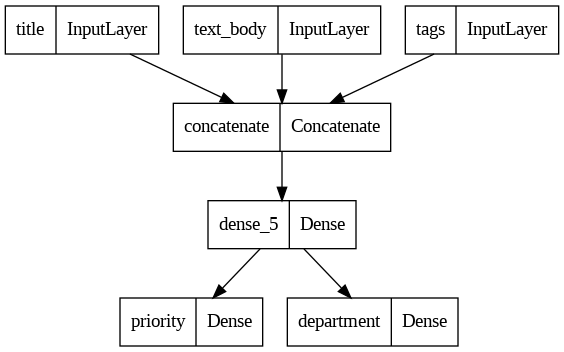

In [22]:
keras.utils.plot_model(model, "ticket_classifier.png")

## Subclassing the Model class

### Rewriting the previous example as a subclassed model

In [31]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation="relu")
    self.priority_scorer = layers.Dense(1, activation="sigmoid")
    self.department_classifier = layers.Dense(
    num_departments, activation="softmax")

  def call(self, inputs):
    title = inputs["title"]
    text_body = inputs["text_body"]
    tags = inputs["tags"]
    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [32]:
model = CustomerTicketModel(num_departments=4)

In [33]:
priority, department = model(
  {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [34]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

In [35]:
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)

40/40 [==============================] - 2s 24ms/step - loss: 28.0084 - output_1_loss: 0.3277 - output_2_loss: 27.6806 - output_1_mean_absolute_error: 0.4943 - output_2_accuracy: 0.1734


In [36]:
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data})

40/40 [==============================] - 1s 10ms/step


## Creating a Functional model that includes a subclassed model

In [40]:
class Classifier(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = "sigmoid"
    else:
      num_units = num_classes
      activation = "softmax"
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)


inputs = keras.Input(shape= (3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs = outputs)

## Creating a subclassed model that includes a Functional model

In [41]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):
  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation="relu")
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()

## Implementing a custom metric by subclassing the Metric class

In [44]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
  inputs = keras.Input(shape=(28 * 28,))
  features = layers.Dense(512, activation="relu")(inputs)
  features = layers.Dropout(0.5)(features)
  outputs = layers.Dense(10, activation="softmax")(features)
  model = keras.Model(inputs, outputs)
  return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2930 - accuracy: 0.9124 - val_loss: 0.1405 - val_accuracy: 0.9589
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1590 - accuracy: 0.9541 - val_loss: 0.1112 - val_accuracy: 0.9692
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


In [45]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
  def __init__(self, name="rmse", **kwargs):
    super().__init__(name=name, ** kwargs)
    self.mse_sum=self.add_weight(name="mse_sum", initializer="zeros")
    self.total_samples = self.add_weight(
        name="total_samples", Initializer="zeros", dtype="int32")

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)

  def result(self):
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)


## A Custom Callback

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2917 - accuracy: 0.9129 - val_loss: 0.1460 - val_accuracy: 0.9582
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1590 - accuracy: 0.9542 - val_loss: 0.1166 - val_accuracy: 0.9680
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1284 - accuracy: 0.9647 - val_loss: 0.0966 - val_accuracy: 0.9742
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1141 - accuracy: 0.9682 - val_loss: 0.0963 - val_accuracy: 0.9745
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1005 - accuracy: 0.9723 - val_loss: 0.0888 - val_accuracy: 0.9769
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0961 - accuracy: 0.9737 - val_loss: 0.0964 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0894 - accuracy: 0.9755 - val_loss: 0.1036 - val_ac

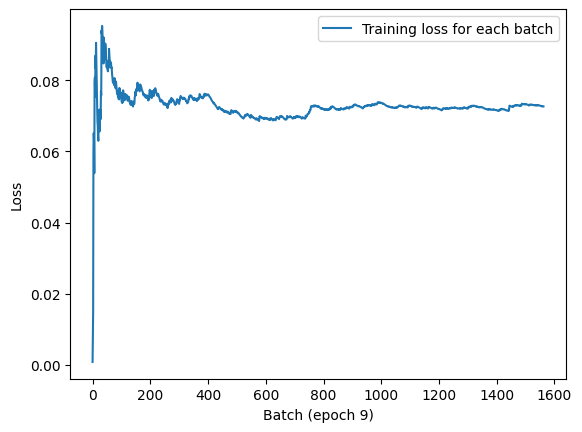

In [49]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):
    self.per_batch_losses = []

  def on_batch_end(self, batch, logs):
    self.per_batch_losses.append(logs.get("loss"))

  def on_epoch_end(self, epoch, logs):
    plt.clf()
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
    label="Training loss for each batch")
    plt.xlabel(f"Batch (epoch {epoch})")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"plot_at_epoch_{epoch}")
    self.per_batch_losses = []

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))